In [1]:
import os
import numpy as np
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [2]:
def extract_features(data_folder):
    # Charger le modèle ResNet50 pré-entraîné sans les couches fully-connected
    # Les couches fully-connected sont souvent utilisées pour la classement finale,
    # mais nous ne les utilisons pas ici car nous voulons utiliser les caractéristiques
    # extraites par ResNet50 pour un autre modèle de machine learning.
    
    model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

    features = []  # Liste pour stocker les caractéristiques des images
    labels = []    # Liste pour stocker les étiquettes des images

    # Parcourir les dossiers de votre dataset (chaque dossier représente un type de fleur)
    for category_folder in os.listdir(data_folder):
        category_path = os.path.join(data_folder, category_folder)
        if os.path.isdir(category_path):  # Vérifier si c'est un dossier
            # Parcourir les images du dossier
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                # Charger l'image et la redimensionner à la taille attendue par ResNet50
                img = image.load_img(image_path, target_size=(224, 224))
                # Convertir l'image en tableau NumPy et ajouter une dimension pour l'échantillon
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                # Prétraiter l'image pour être compatible avec ResNet50
                img_array = preprocess_input(img_array)
                # Extraire les caractéristiques de l'image en utilisant ResNet50
                features.append(model.predict(img_array).flatten())
                # Ajouter l'étiquette correspondante à l'image
                labels.append(category_folder)

                # Augmenter les données en effectuant une rotation de l'image
                rotated_img_array = np.rot90(img_array, k=1, axes=(1, 2))
                # Extraire les caractéristiques de l'image rotatée
                features.append(model.predict(rotated_img_array).flatten())
                # Ajouter l'étiquette correspondante à l'image rotatée
                labels.append(category_folder)

    # Convertir les listes en tableaux NumPy
    features = np.array(features)
    labels = np.array(labels)
    return features, labels


In [3]:
# Chemin vers le dossier DATA
data_folder = 'DATA'

# Extraction des caractéristiques et des étiquettes
features, labels = extract_features(data_folder)



1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [4]:
# Diviser les données en ensembles de train et de test(utilisant la régle 2/3 , 1/3 )
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)




In [5]:
from sklearn.svm import SVC  # Importer la classe SVC pour le Support Vector Classifier
from sklearn.model_selection import GridSearchCV  # Importer GridSearchCV pour la recherche des meilleurs hyperparamètres

# Créer une instance du modèle SVC
model = SVC()

# Définir les paramètres à rechercher avec GridSearchCV
parameters = {
    'C': [1, 10, 100, 1000],  # Paramètre de régularisation pour contrôler la pénalité pour les erreurs de classement
    'gamma': [0.01, 0.001, 0.0001],  # Paramètre du noyau pour les SVM non linéaires
}

# Utiliser GridSearchCV pour rechercher les meilleurs paramètres
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5)


In [6]:
# Utiliser GridSearchCV pour rechercher les meilleurs paramètres
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001]})

In [8]:
grid_search.best_params_
#grid_search.best_params_ renvoie un dictionnaire contenant les paramètres optimaux trouvés
# par la recherche par grille (GridSearch). 
#Ces paramètres sont déterminés en testant différentes combinaisons de paramètres du modèle 
#et en sélectionnant ceux qui donnent les meilleures performances .
#Ces paramètres sont ceux qui maximisent les performances du modèle sur l'ensemble 
#de validation croisée spécifié lors de la création de l'objet GridSearchCV.

{'C': 10, 'gamma': 0.001}

In [9]:
grid_search.best_score_
#renvoie le score moyen obtenu . 
#Ce score représente une mesure de la performance du modèle avec les paramètres optimaux 
#sélectionnés par la recherche par grille (GridSearch).

0.9543709545183384

In [10]:
# Assigner le meilleur estimateur trouvé par la recherche par grille à la variable MyModel
MyModel = grid_search.best_estimator_

# Calculer et afficher le score du modèle sur l'ensemble de test
MyModel.score(X_test, y_test)


0.9616079494128275

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Faire des prédictions sur l'ensemble de test
y_pred = MyModel.predict(X_test)

# Calculer et afficher la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("La précision du modèle KNN :", accuracy)


 la précision de model KNN : 0.9616079494128275


Matrice de confusion :
 [[ 85   0   0   0   0   1   0   0   2   0   3]
 [  0 232   5   0   0   0   2   0   1   0   2]
 [  0   1 330   0   0   0   0   0   0   5   0]
 [  0   0   0  74   1   0   0   0   0   1   0]
 [  0   1   2   2 212   0   0   0   2   0   0]
 [  0   0   0   0   0 185   0   0   1   1   4]
 [  0   0   1   0   0   0 209   1   0   4   0]
 [  0   0   0   0   0   0   0  90   1   1   1]
 [  0   0   0   0   4   1   1   0 200   0   9]
 [  0   0   3   0   0   0   0   0   0 249   2]
 [  0   1   2   0   2   5   2   0   6   1 263]]


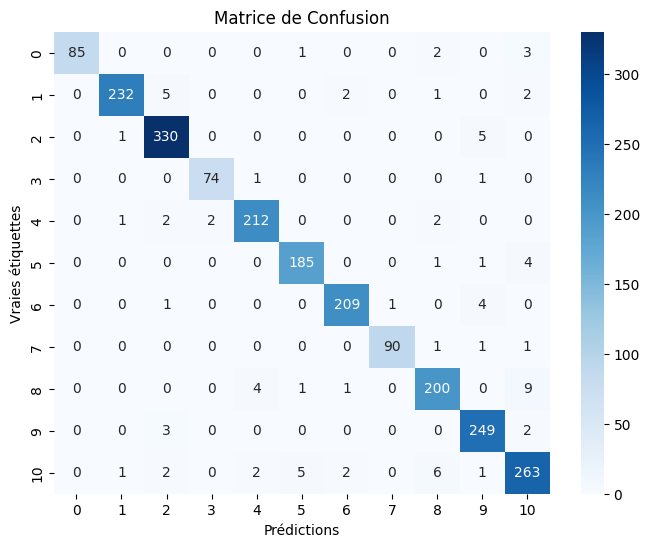

In [12]:
#matrice_confusion _plot 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [14]:
# Enregistrer le modèle dans un fichier
pickle.dump(MyModel, open('MyModel/modelCNNCV.p', 'wb'))
